In [2]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
df_encoded=pd.read_csv("datos\datos_nulos_encoded.csv", index_col=0)
df_encoded.reset_index(drop=True, inplace=True)

In [4]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360401 entries, 0 to 360400
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                360401 non-null  int64  
 1   vehicleType          360401 non-null  float64
 2   yearOfRegistration   360401 non-null  float64
 3   gearbox              360401 non-null  float64
 4   monthOfRegistration  360401 non-null  float64
 5   fuelType             360401 non-null  float64
 6   brand                360401 non-null  float64
 7   notRepairedDamage    360401 non-null  float64
 8   yearCreated          360401 non-null  float64
 9   monthCreated         360401 non-null  float64
 10  powerCV_robust       360401 non-null  float64
 11  kilometer_robust     360401 non-null  float64
 12  abtest_control       360401 non-null  float64
 13  abtest_test          360401 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 38.5 MB


In [5]:
df_encoded.head()

,price,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,yearCreated,monthCreated,powerCV_robust,kilometer_robust,abtest_control,abtest_test
0,480,5159.856113,4564.535429,4727.559085,2494.627126,5002.971271,5323.888161,3235.898669,5916.421491,5854.684494,0.076874,0.0,0.0,1.0
1,18300,11832.189405,12217.768059,4727.559085,6113.082894,8581.841188,8967.008541,2226.078714,5916.421491,5854.684494,1.063492,-0.5,0.0,1.0
2,9800,13294.516105,4564.535429,10690.463180,6149.016849,8581.841188,11044.232529,3235.898669,5916.421491,5854.684494,0.650794,-0.5,0.0,1.0
3,1500,2796.719833,4564.535429,4727.559085,6269.662202,5002.971271,5323.888161,7091.882008,5916.421491,5854.684494,-0.730159,0.0,0.0,1.0
4,3600,2796.719833,4564.535429,4727.559085,6723.013979,8581.841188,6486.861500,7091.882008,5916.421491,5854.684494,-0.825397,-1.2,0.0,1.0


In [6]:
df_encoded.duplicated().sum()

np.int64(21086)

Separamos en x e y

In [7]:
x= df_encoded.drop(columns="price")
y= df_encoded[["price"]]

In [8]:
x.head()

,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,yearCreated,monthCreated,powerCV_robust,kilometer_robust,abtest_control,abtest_test
0,5159.856113,4564.535429,4727.559085,2494.627126,5002.971271,5323.888161,3235.898669,5916.421491,5854.684494,0.076874,0.0,0.0,1.0
1,11832.189405,12217.768059,4727.559085,6113.082894,8581.841188,8967.008541,2226.078714,5916.421491,5854.684494,1.063492,-0.5,0.0,1.0
2,13294.516105,4564.535429,10690.463180,6149.016849,8581.841188,11044.232529,3235.898669,5916.421491,5854.684494,0.650794,-0.5,0.0,1.0
3,2796.719833,4564.535429,4727.559085,6269.662202,5002.971271,5323.888161,7091.882008,5916.421491,5854.684494,-0.730159,0.0,0.0,1.0
4,2796.719833,4564.535429,4727.559085,6723.013979,8581.841188,6486.861500,7091.882008,5916.421491,5854.684494,-0.825397,-1.2,0.0,1.0


In [9]:
y.head()

,price
0,480
1,18300
2,9800
3,1500
4,3600


Separamos en train y test y le hacemos aprender

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, random_state=42)
modelo_lineal= LinearRegression()
modelo_lineal.fit(x_train, y_train) 

LinearRegression()

Ahora hacemos la predicción

In [11]:
y_test_pred=modelo_lineal.predict(x_test)         #con esto predice un precio
y_train_pred= modelo_lineal.predict(x_train)

In [12]:
metricas = {
    'train': {
        'r2_score': r2_score(y_train, y_train_pred),
        'MAE': mean_absolute_error(y_train, y_train_pred),
        'MSE': mean_squared_error(y_train, y_train_pred),
        'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))
    },
    'test': {
        'r2_score': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred))

    }
}

In [13]:
metricas_pd=pd.DataFrame(metricas)

In [14]:
metricas_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.479389,3246.366271,4.494529e+07,6704.125094
test,0.498915,3233.011666,4.112651e+07,6412.995281


In [15]:
metricas_pd.reset_index(inplace=True)

In [16]:
metricas_pd

,index,train,test
0,r2_score,4.793891e-01,4.989145e-01
1,MAE,3.246366e+03,3.233012e+03
2,MSE,4.494529e+07,4.112651e+07
3,RMSE,6.704125e+03,6.412995e+03


Dado que coinciden bastante las RMSE, no se está dando ni over fitting ni under fitting

Vamos a intentar visualizar las cositas

In [17]:
predytets=pd.DataFrame(y_test_pred, columns=["y_test_pred"])

In [18]:
predytrain=pd.DataFrame(y_train_pred, columns=["y_train_pred"])

In [19]:
df_fin=pd.DataFrame()
df_fin=pd.concat([df_fin, predytets, predytrain, y], ignore_index=True, axis=1)

In [20]:
df_fin.columns= ["test pre", "train pre", "pre"]

In [21]:
df_fin.reset_index(inplace=True)

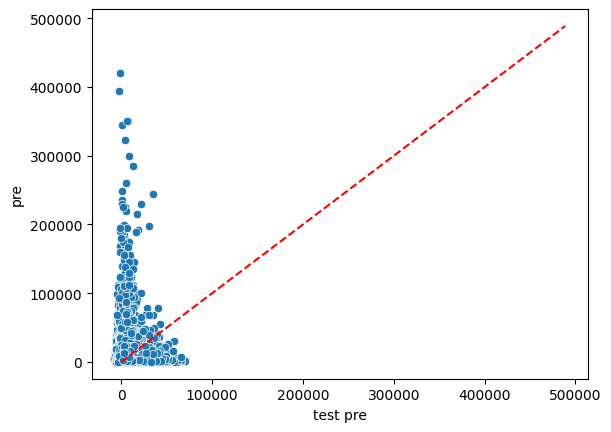

In [22]:
sns.scatterplot(x="test pre", y="pre", data= df_fin)
plt.plot([df_fin["pre"].min(), df_fin["pre"].max()],
         [df_fin["pre"].min(), df_fin["pre"].max()],
         color='red', linestyle='--', label='x = y')

In [23]:
df_fino=df_fin[df_fin["pre"] <100000]

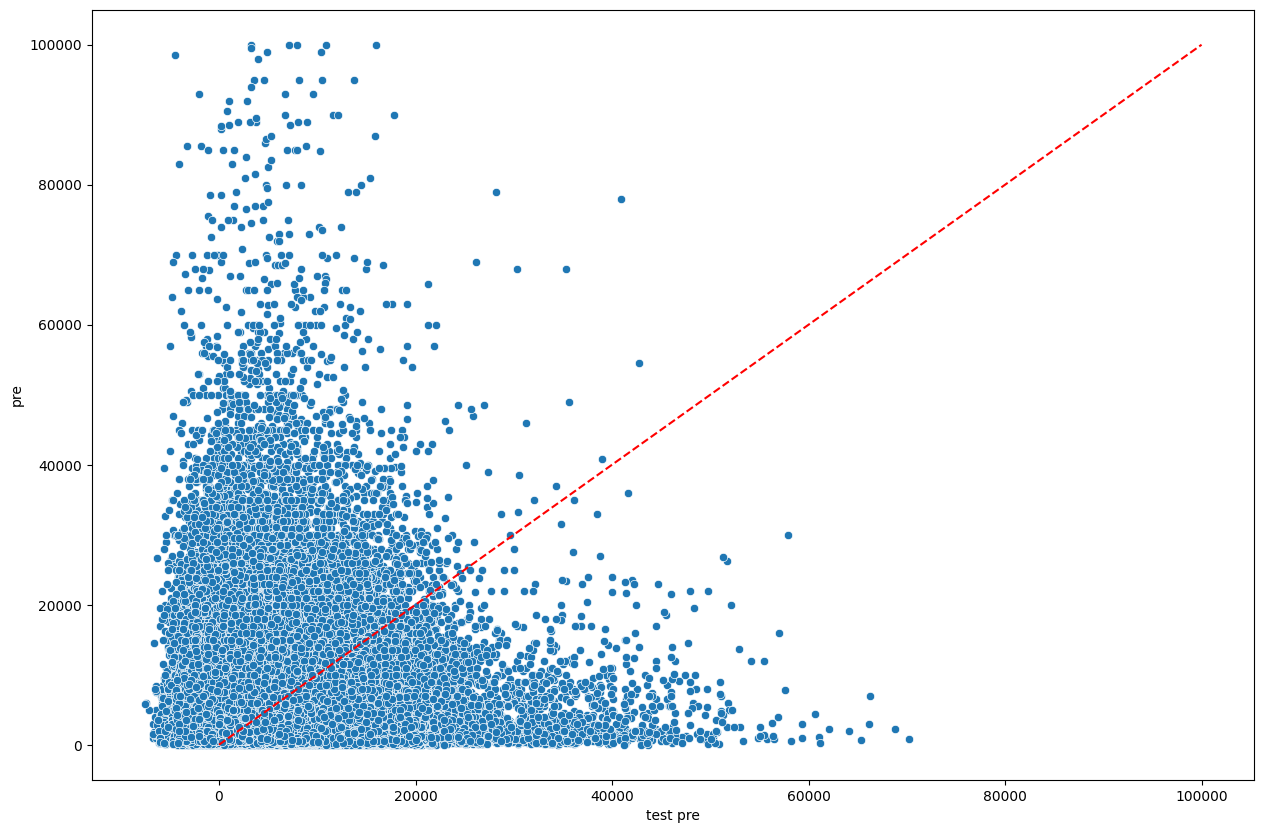

In [24]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="test pre", y="pre", data= df_fino)
plt.plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')

<Axes: xlabel='train pre', ylabel='pre'>

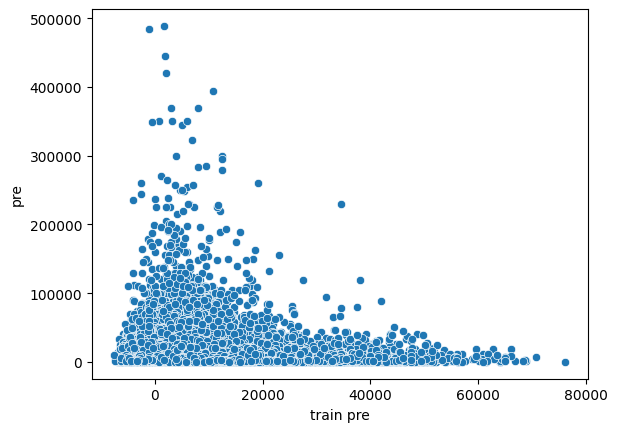

In [25]:
sns.scatterplot(x="train pre", y="pre", data= df_fin)

VOY A PROBAR COGIENDO UN 80 DE ENTRENAMIENTO

In [26]:
x_train80, x_test80, y_train80, y_test80 = train_test_split(x, y, train_size= 0.8, random_state=42)
modelo_lineal80= LinearRegression()
modelo_lineal80.fit(x_train80, y_train80) 

LinearRegression()

Ahora hacemos la predicción

In [27]:
y_test_pred80=modelo_lineal80.predict(x_test80)         #con esto predice un precio
y_train_pred80= modelo_lineal80.predict(x_train80)

In [28]:
metricas80 = {
    'train': {
        'r2_score': r2_score(y_train80, y_train_pred80),
        'MAE': mean_absolute_error(y_train80, y_train_pred80),
        'MSE': mean_squared_error(y_train80, y_train_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_train80, y_train_pred80))
    },
    'test': {
        'r2_score': r2_score(y_test80, y_test_pred80),
        'MAE': mean_absolute_error(y_test80, y_test_pred80),
        'MSE': mean_squared_error(y_test80, y_test_pred80),
        'RMSE': np.sqrt(mean_squared_error(y_test80, y_test_pred80))

    }
}

In [29]:
metricas80_pd=pd.DataFrame(metricas80)

In [30]:
metricas80_pd.head().T

,r2_score,MAE,MSE,RMSE
train,0.485202,3244.723893,4.390614e+07,6626.170570
test,0.484422,3236.599646,4.337109e+07,6585.673302


In [31]:
metricas80_pd.reset_index(inplace=True)

In [32]:
metricas80_pd

,index,train,test
0,r2_score,4.852022e-01,4.844216e-01
1,MAE,3.244724e+03,3.236600e+03
2,MSE,4.390614e+07,4.337109e+07
3,RMSE,6.626171e+03,6.585673e+03


Dado que coinciden bastante las RMSE, no se está dando ni over fitting ni under fitting

Vamos a intentar visualizar las cositas

In [33]:
predytets80=pd.DataFrame(y_test_pred80, columns=["y_test_pred80"])

In [34]:
predytrain80=pd.DataFrame(y_train_pred80, columns=["y_train_pred80"])

In [35]:
df_fin80=pd.DataFrame()
df_fin80=pd.concat([df_fin80, predytets80, predytrain80, y], ignore_index=True, axis=1)

In [36]:
df_fin80.columns= ["test pre80", "train pre80", "pre"]

In [37]:
df_fin80.reset_index(inplace=True)

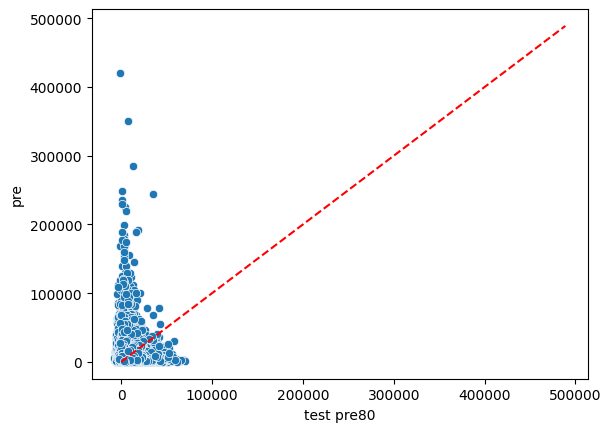

In [38]:
sns.scatterplot(x="test pre80", y="pre", data= df_fin80)
plt.plot([df_fin80["pre"].min(), df_fin80["pre"].max()],
         [df_fin80["pre"].min(), df_fin80["pre"].max()],
         color='red', linestyle='--', label='x = y')

In [39]:
df_fino80=df_fin80[df_fin80["pre"] <100000]

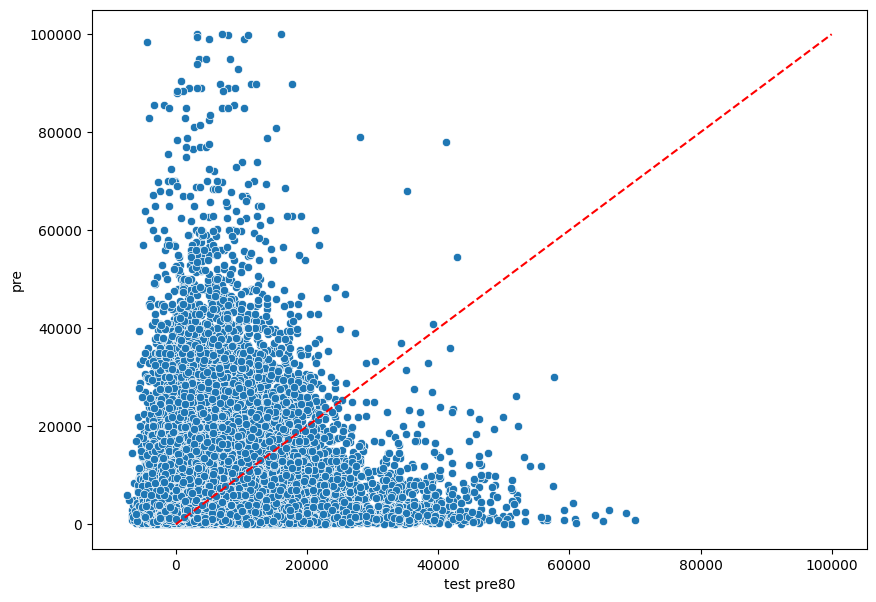

In [40]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="test pre80", y="pre", data= df_fino80)
plt.plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')

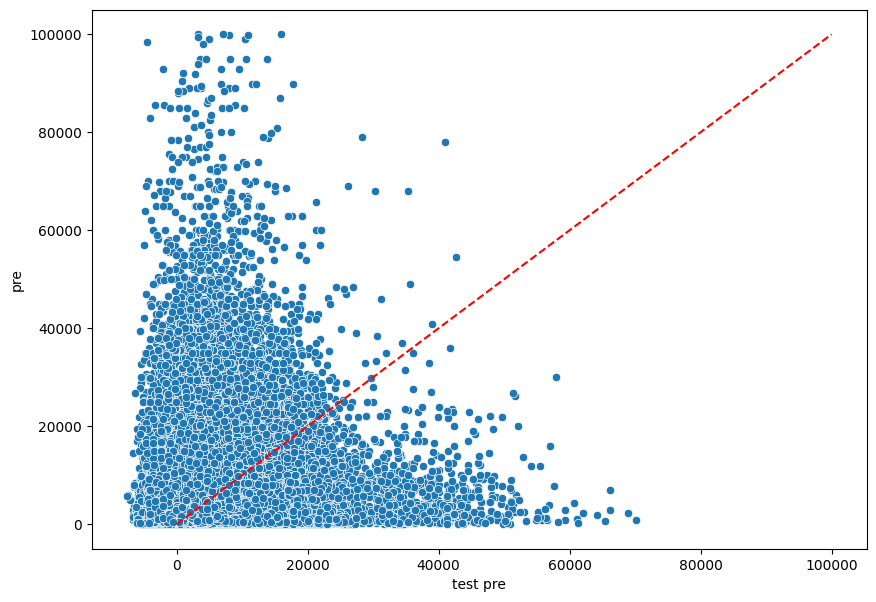

In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="test pre", y="pre", data= df_fino)
plt.plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')

<Figure size 1000x800 with 0 Axes>

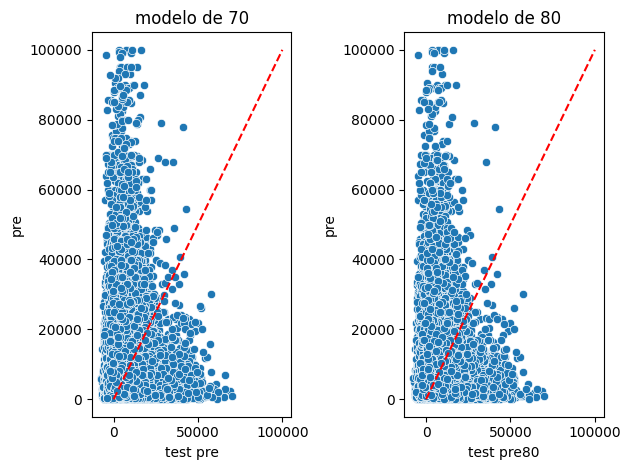

In [47]:
plt.figure(figsize=(10,8))
fig, axes =plt.subplots(nrows=1, ncols=2)
axes=axes.flat

sns.scatterplot(x="test pre", y="pre", data= df_fino, ax=axes[0])
axes[0].plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')
axes[0].set_title("modelo de 70")



sns.scatterplot(x="test pre80", y="pre", data= df_fino80, ax= axes[1])
axes[1].plot([df_fino["pre"].min(), df_fino["pre"].max()],
         [df_fino["pre"].min(), df_fino["pre"].max()],
         color='red', linestyle='--', label='x = y')
axes[1].set_title("modelo de 80")
plt.tight_layout()

In [ ]:
metricas_pd

,index,train,test
0,r2_score,4.793891e-01,4.989145e-01
1,MAE,3.246366e+03,3.233012e+03
2,MSE,4.494529e+07,4.112651e+07
3,RMSE,6.704125e+03,6.412995e+03


In [ ]:
metricas80_pd

,index,train,test
0,r2_score,4.852022e-01,4.844216e-01
1,MAE,3.244724e+03,3.236600e+03
2,MSE,4.390614e+07,4.337109e+07
3,RMSE,6.626171e+03,6.585673e+03
